# Autoencoder

> Autoencoder

In [ ]:
#| default_exp autoencoder

In [ ]:
#| hide
from nbdev.showdoc import *
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from fastcore.test import test_eq

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
#| export
class BabyAutoEncoder(nn.Module):
    """Pretty much the simplest autoencoder you can imagine."""

    def __init__(self, n_in, n_latent, n_out):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(n_in, n_latent),
            nn.ReLU(inplace=True),
            nn.Linear(n_latent, n_out)
        )
    
    def forward(self, x):
        return self.model(x)

    def calculate_loss(self, x):
        ...  # TODO: reconstruction loss

In [ ]:
n_in = n_out = 64
n_latent = 4

model = BabyAutoEncoder(n_in, n_latent, n_out)

x = torch.rand(1, n_in)

out = model(x)
test_eq(out.shape, (1, n_out))

## Data

In [ ]:
#| hide
from torchvision import datasets
from torchvision.transforms import ToTensor

### MNNIST

In [ ]:
mnist_train = datasets.MNIST(root="datasets", train=True, 
                             download=True, transform=ToTensor())
mnist_val = datasets.MNIST(root="datasets", train=False,
                           transform=ToTensor())
mnist_train, mnist_val

(Dataset MNIST
     Number of datapoints: 60000
     Root location: datasets
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: datasets
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
d0 = mnist_train[0]

In [ ]:
[type(x) for x in d0]

[torch.Tensor, int]

In [ ]:
d0[0].shape

torch.Size([1, 28, 28])

In [ ]:
# Print attributes
[s for s in dir(mnist_train) if not s.startswith("_")]

['class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [ ]:
mnist_train.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [ ]:
mnist_loaders = {
    "train": torch.utils.data.DataLoader(mnist_train, batch_size=32, shuffle=True),
    "val": torch.utils.data.DataLoader(mnist_val, batch_size=32, shuffle=False),
}

In [ ]:
dl0 = next(iter(mnist_loaders["train"]))
dl0[0].shape

torch.Size([32, 1, 28, 28])

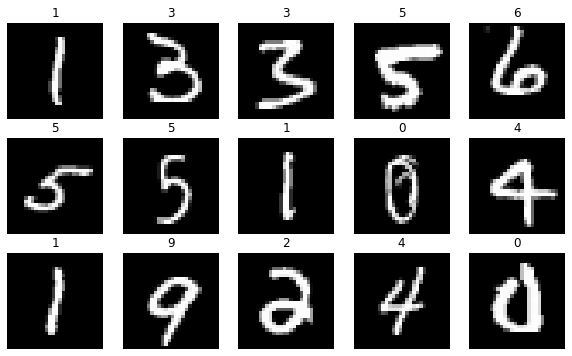

In [ ]:
# Show a batch of images

batch = next(iter(mnist_loaders["train"]))
images, labels = batch[:15]
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i].squeeze().numpy(), cmap="gray")
    ax.set_title(labels[i].item())
    ax.axis("off")

### Fashion MNIST

In [ ]:
# TODO

## Autoencoder

In [ ]:
from models import BabyAutoEncoder

# ae_model = BabyAutoEncoder()

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()